In [1]:
import networkx as nx # make sure networkx is installed (https://pypi.org/project/networkx/#description)
import matplotlib.pyplot as plt
import datetime
import csv
import random
import collections
import math
import numpy as np
from scipy import sparse
from sklearn import metrics
import sklearn
from sklearn.cluster import KMeans

#Problem 3

#results

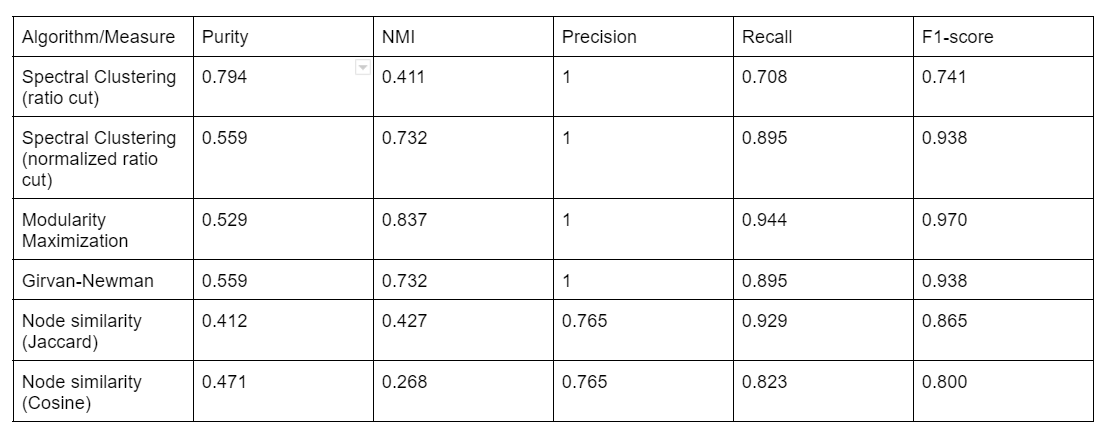

In [2]:
karate = nx.karate_club_graph()
karate.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [3]:
lap_karate = nx.laplacian_matrix(karate)
lap_norm_karate = nx.normalized_laplacian_matrix(karate)

#some functions

In [4]:
def purity(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  correct = sum(confusion_matrix)[0]
  all = sum(sum(confusion_matrix))
  purity = correct/all
  return purity

In [5]:
def get_membership_arr():
  membership = [karate.nodes[v]['club'] for v in karate.nodes()]
  j = 0
  i = 0
  for i in range(len(membership)):
    if membership[j] == 'Officer':
      membership[j] = 0
      j = j+1
    else:
      membership[j] = 1
      j = j + 1

  membership_arr = np.asarray(membership)
  return membership_arr

In [6]:
def compute_precision(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  tp = confusion_matrix[0][0]
  fp = confusion_matrix[0][1]
  precision = tp / (tp + fp)
  return precision

In [7]:
def compute_recall(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  tp = confusion_matrix[0][0]
  fn = confusion_matrix[1][0]
  recall = tp / (tp + fn)
  return recall

#Spectral clustering

In [8]:
# eigvals_karate = nx.laplacian_spectrum(karate)

In [9]:
# lap_karate_numpy = nx.to_numpy_matrix(lap_karate)
lap_karate = lap_karate.todense()
e, v = np.linalg.eig(lap_karate)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[ 1.81366960e+01  1.70551712e+01  1.33061223e+01  1.09210675e+01
  9.77724095e+00  6.99619703e+00  6.51554463e+00  6.33159222e+00
 -3.03715976e-15  5.37859508e+00  4.68525227e-01  4.58079267e+00
  4.48000767e+00  4.27587682e+00  9.09247664e-01  1.12501072e+00
  1.25940411e+00  1.59928308e+00  1.76189862e+00  1.82605521e+00
  1.95505045e+00  2.48709173e+00  2.74915718e+00  3.01396297e+00
  3.24206748e+00  3.47218740e+00  5.61803399e+00  3.37615409e+00
  2.00000000e+00  3.38196601e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00  2.00000000e+00]
eigenvectors:
[[ 1.93749031e-01 -9.40932167e-01 -9.47825261e-02 ...  1.67168731e-16
  -3.69951351e-17  7.31283825e-17]
 [ 5.22422164e-03  6.58647640e-02  9.91845054e-02 ... -1.14645366e-16
   5.13980456e-17 -1.90723045e-17]
 [ 2.91860881e-02  1.15069117e-01 -3.14797911e-01 ...  4.37720638e-16
  -1.86437308e-16  2.52549417e-16]
 ...
 [-8.55124031e-02  7.68509217e-02 -1.23027130e-01 ...  1.12575492e-16
   1.75220610e-17 -1.02542084

In [10]:
x = v[:,8]
y = v[:, 10]
print(x)
print(y)

[[-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]
 [-0.17149859]]
[[-0.11213743]
 [-0.04128789]
 [ 0.02321896]
 [-0.05549978]
 [-0.28460453]
 [-0.32372722]
 [-0.32372722]
 [-0.052586  ]
 [ 0.05160128]
 [ 0.09280089]
 [-0.28460453]
 [-0.21099295]
 [-0.1094613 ]
 [-0.01474197]
 [ 0.16275078]
 [ 0.16275078]
 [-0.42276533]
 [-0.10018142]
 [ 0.16275078]
 [-0.01363713]
 [ 0.16275078]
 [-0.10018142]
 [ 0.16275078]
 [ 0.15569457]
 [ 0.15302558]
 [ 0.16096292]
 [ 0.18710956]
 [ 0.12766405]
 [ 0.0951523 ]
 [ 0.16765031]
 [ 0.07349964]
 [ 0.09875343]
 [ 0.1303

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(y)
kmeans.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
purity(get_membership_arr(), kmeans.labels_[:])

0.7058823529411765

In [13]:
sklearn.metrics.normalized_mutual_info_score(get_membership_arr(), kmeans.labels_[:])

0.41118040094190855

In [14]:
compute_precision(get_membership_arr(), kmeans.labels_[:])

1.0

In [15]:
compute_recall(get_membership_arr(), kmeans.labels_[:])

0.7083333333333334

In [16]:
sklearn.metrics.f1_score(get_membership_arr(), kmeans.labels_[:])

0.7407407407407407

#normalized spectral clustering

In [17]:
lap_norm_karate = lap_norm_karate
e2, v2 = np.linalg.eig(lap_norm_karate.todense())
# eigenvalues
print('eigenvalues:')
print(e2)
# eigenvectors
print('eigenvectors:')
print(v2)

eigenvalues:
[-1.38777878e-16  1.32272329e-01  2.87048985e-01  3.87313233e-01
  1.71461135e+00  6.12230540e-01  6.48992947e-01  7.07208202e-01
  7.39957989e-01  7.70910617e-01  8.22942852e-01  8.64832945e-01
  9.06816002e-01  1.10538084e+00  1.15929996e+00  1.26802355e+00
  1.61190959e+00  1.56950660e+00  1.35177826e+00  1.39310454e+00
  1.41691585e+00  1.44857938e+00  1.49703011e+00  1.58333333e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
eigenvectors:
[[ 3.20256308e-01  2.96399797e-01 -1.44586983e-01 ...  7.99561226e-17
  -1.04288950e-16  1.88043738e-16]
 [ 2.40192231e-01  1.13413889e-01 -3.50466912e-01 ... -9.21851873e-17
   1.85577799e-16 -1.73919624e-16]
 [ 2.53184842e-01 -8.97112612e-03 -2.11481660e-01 ...  1.19297975e-16
  -1.50416191e-16  5.27656168e-16]
 ...
 [ 1.96116135e-01 -1.28108134e-01  1.10871456e-01 ... -1.21106745e-16
   9.35523949e-16 -3.57029545

In [18]:
x2 = v2[:,0]
y2 = v2[:, 1]
print(x2)
print(y2)

[[0.32025631]
 [0.24019223]
 [0.25318484]
 [0.19611614]
 [0.13867505]
 [0.16012815]
 [0.16012815]
 [0.16012815]
 [0.17902872]
 [0.1132277 ]
 [0.13867505]
 [0.08006408]
 [0.1132277 ]
 [0.17902872]
 [0.1132277 ]
 [0.1132277 ]
 [0.1132277 ]
 [0.1132277 ]
 [0.1132277 ]
 [0.13867505]
 [0.1132277 ]
 [0.1132277 ]
 [0.1132277 ]
 [0.17902872]
 [0.13867505]
 [0.13867505]
 [0.1132277 ]
 [0.16012815]
 [0.13867505]
 [0.16012815]
 [0.16012815]
 [0.19611614]
 [0.2773501 ]
 [0.33011265]]
[[ 0.2963998 ]
 [ 0.11341389]
 [-0.00897113]
 [ 0.11512758]
 [ 0.2671717 ]
 [ 0.34638736]
 [ 0.34638736]
 [ 0.08992931]
 [-0.05282964]
 [-0.05563406]
 [ 0.2671717 ]
 [ 0.0853954 ]
 [ 0.09868424]
 [ 0.04671125]
 [-0.11251508]
 [-0.11251508]
 [ 0.28226926]
 [ 0.09119046]
 [-0.11251508]
 [ 0.03091925]
 [-0.11251508]
 [ 0.09119046]
 [-0.11251508]
 [-0.19602288]
 [-0.13544115]
 [-0.14515535]
 [-0.12748466]
 [-0.1349113 ]
 [-0.08022324]
 [-0.18201707]
 [-0.07139028]
 [-0.12810813]
 [-0.25162746]
 [-0.26979354]]


In [19]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(y2)
kmeans2.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [20]:
purity(get_membership_arr(), kmeans2.labels_[:])

0.5588235294117647

In [21]:
sklearn.metrics.normalized_mutual_info_score(get_membership_arr(), kmeans2.labels_[:])

0.7323776321005694

In [22]:
compute_precision(get_membership_arr(), kmeans2.labels_[:])

1.0

In [23]:
compute_recall(get_membership_arr(), kmeans2.labels_[:])

0.8947368421052632

In [24]:
sklearn.metrics.f1_score(get_membership_arr(), kmeans2.labels_[:])

0.9375

#modularity maximization

In [ ]:
mod_matrix = nx.modularity_matrix(karate)
e3, v3 = np.linalg.eig(mod_matrix)
e3 = np.real(e3)
v3 = np.real(v3)
# eigenvalues
print('eigenvalues:')
print(e3)
# eigenvectors
print('eigenvectors:')
print(v3)

In [ ]:
x3 = v3[:,1]
y3 = v3[:, 2]
print(x3)
print(y3)

In [27]:
kmeans3 = KMeans(n_clusters=2, random_state=0).fit(x3)
kmeans3.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
def flip_array(array):
  j = 0
  i = 0
  for i in range(len(array)):
    if array[j] == 0:
      array[j] = 1
      j = j+1
    else:
      array[j] = 0
      j = j + 1

  new_arr = np.asarray(array)
  return new_arr

In [29]:
flipped_mod = flip_array(kmeans3.labels_)
print(flipped_mod)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
purity(get_membership_arr(), flipped_mod)

0.5294117647058824

In [31]:
confusion_matrix2 = metrics.confusion_matrix(get_membership_arr(), flipped_mod)
print(confusion_matrix2)

[[17  0]
 [ 1 16]]


In [32]:
sklearn.metrics.normalized_mutual_info_score(get_membership_arr(), flipped_mod)

0.8371694628777809

In [33]:
compute_precision(get_membership_arr(), flipped_mod)

1.0

In [34]:
compute_recall(get_membership_arr(), flipped_mod)

0.9444444444444444

In [35]:
sklearn.metrics.f1_score(get_membership_arr(), flipped_mod)

0.9696969696969697

#Girvan-Newman 

In [57]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(karate)
com_tuple = tuple(sorted(c) for c in next(communities))
print(com_tuple)

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


In [58]:
GN_assignment = [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [59]:
purity(get_membership_arr(), GN_assignment)

0.5588235294117647

In [60]:
sklearn.metrics.normalized_mutual_info_score(get_membership_arr(), GN_assignment)

0.7323776321005694

In [61]:
compute_precision(get_membership_arr(), GN_assignment)

1.0

In [62]:
compute_recall(get_membership_arr(), GN_assignment)

0.8947368421052632

In [63]:
sklearn.metrics.f1_score(get_membership_arr(), GN_assignment)

0.9375

In [55]:
# x = 0
# y = 0

# print(com_tuple[0])
# for x in range(len(com_tuple[0])):
#   com_tuple[0][x] = 1

# for y in range(len(com_tuple[1])):
#   com_tuple[1][y] = 0

# print(com_tuple)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


#Node Similarity

#Jaccard Test 
 Disregard (jaccard computed further below)

In [ ]:
jaccard = nx.jaccard_coefficient(karate)
# for u, v, p in jaccard:
#     print(f"({u}, {v}) -> {p:.8f}")
matrix = np.zeros(shape=(34,34))
u = 0
v = 0 
p = 0
a = 0
b = 0
c=0

for u, v, p in jaccard:
    # for a in range(u):
    #   for b in range(v):
    #     for c in range(v):
          matrix[u, v] = p
      #     c = c+1
      #   b = b+ 1
      # a = a + 1

# with np.printoptions(threshold=np.inf):
#     print(matrix)

distance_matrix = 1 - matrix

In [109]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(distance_matrix)

clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
purity(get_membership_arr(), clustering.labels_)

0.8235294117647058

In [111]:
sklearn.metrics.normalized_mutual_info_score(get_membership_arr(), clustering.labels_)

0.08841241724654092

In [112]:
compute_precision(get_membership_arr(), clustering.labels_)

0.7058823529411765

In [113]:
compute_recall(get_membership_arr(), clustering.labels_)

0.42857142857142855

In [114]:
sklearn.metrics.f1_score(get_membership_arr(), clustering.labels_)

0.08695652173913045

#Cosine Similarity

In [116]:
def compute_cosine(G, node1, node2):
  node1_neighbors = [n for n in sorted(G.neighbors(node1))]
  node2_neighbors = [n for n in sorted(G.neighbors(node2))]

  intersection = len(list(set(node1_neighbors).intersection(node2_neighbors)))
  denominator = math.sqrt((len(node1_neighbors) * len(node2_neighbors)))
  return float(intersection) / denominator

In [119]:
matrix2 = np.zeros(shape=(34,34))
u = 0
v = 0
for u in range(34):
  for v in range(34):
    matrix2[u, v] = compute_cosine(karate, u,v)

distance_matrix2 = 1 - matrix2

In [120]:
clustering2 = AgglomerativeClustering().fit(distance_matrix2)

clustering2.labels_

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [146]:
flipped_cos = flip_array(clustering2.labels_)
print(flipped_cos)

[1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1]


In [152]:
purity(get_membership_arr(), flipped_cos)

0.47058823529411764

In [151]:
sklearn.metrics.normalized_mutual_info_score(get_membership_arr(), flipped_cos)

0.26812666168304017

In [148]:
compute_precision(get_membership_arr(), flipped_cos)

0.7647058823529411

In [149]:
compute_recall(get_membership_arr(), flipped_cos)

0.8125

In [150]:
sklearn.metrics.f1_score(get_membership_arr(), flipped_cos)

0.7999999999999999

#Jaccard Similarity

In [153]:
def compute_jaccard(G, node1, node2):
  
  node1_neighbors = [n for n in sorted(G.neighbors(node1))]
  node2_neighbors = [n for n in sorted(G.neighbors(node2))]

  intersection = len(list(set(node1_neighbors).intersection(node2_neighbors)))
  union = (len(node1_neighbors) + len(node2_neighbors)) - intersection
  return float(intersection) / union

In [154]:
matrix3 = np.zeros(shape=(34,34))
u = 0
v = 0
for u in range(34):
  for v in range(34):
    matrix3[u, v] = compute_jaccard(karate, u,v)

distance_matrix3 = 1 - matrix3

In [155]:
clustering3 = AgglomerativeClustering().fit(distance_matrix3)

clustering3.labels_

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [156]:
purity(get_membership_arr(), clustering3.labels_)

0.4117647058823529

In [157]:
sklearn.metrics.normalized_mutual_info_score(get_membership_arr(), clustering3.labels_)

0.42730073658074413

In [158]:
compute_precision(get_membership_arr(), clustering3.labels_)

0.7647058823529411

In [159]:
compute_recall(get_membership_arr(), clustering3.labels_)

0.9285714285714286

In [160]:
sklearn.metrics.f1_score(get_membership_arr(), clustering3.labels_)

0.8648648648648648